# Práctica 2 - Aprendizaje Automático (Ejercicio 2)

## Enunciado

En el segon exercici (dificultat B), farem la comparació del rendiment dels tres models anteriors
amb el data set complert del repositori UCI Machine learning[7]. Primer proveu si canvien els
resultats de l’exercici 1 quan s’aplica a noves dades no emprades a aprenentatge ni a test.
Després, intentar millorar els resultats re-aprenent els models amb nous conjunts
d’aprenentatge, test i validació, emprant el mètode de k-fold crossvalidation[8] per triar el
millor model.

In [1]:
#pip install ucimlrepo


In [16]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, datasets,svm
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
#dataset Ej 1, UTILIZADO PARA ENTRENAMIENTO Y APRENDIZAJE
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [26]:
#Entrenamiento con Dataset del Ej 1
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=42,shuffle=False)
#Entrenamiento con Dataset del Ej 2
X_trainUCI, X_testUCI, y_trainUCI, y_testUCI = train_test_split(X, y, test_size=0.5, random_state=42,shuffle=False)

La función GridSearchCV realizará la búsqueda de hiperparámetros utilizando validación cruzada interna

## Perceptrón

C:\Users\hugot\miniconda3\envs\ia2023\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


Classification report for classifier Perceptron(random_state=42):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       285
           1       0.79      0.96      0.87       281
           2       0.99      0.97      0.98       277
           3       0.95      0.90      0.92       297
           4       0.99      0.89      0.94       275
           5       0.82      0.97      0.89       273
           6       0.95      0.98      0.97       284
           7       0.98      0.93      0.96       274
           8       0.94      0.76      0.84       288
           9       0.92      0.86      0.89       276

    accuracy                           0.92      2810
   macro avg       0.93      0.92      0.92      2810
weighted avg       0.93      0.92      0.92      2810




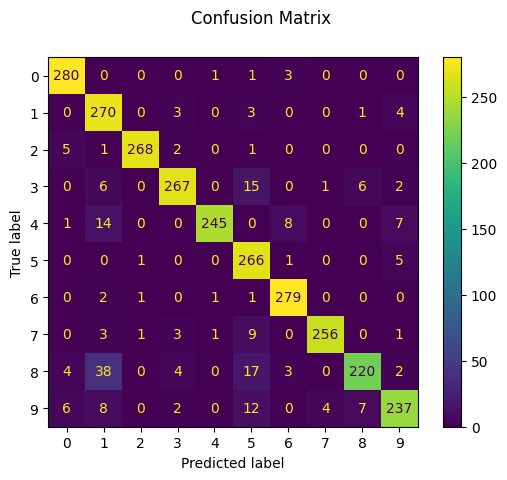

In [22]:
#Se crear el clasificadro con el modelo lineal del perceptron y seguidamente se entrena
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)
# Se hace la predicción de los datos para testear
y_pred = perceptron.predict(X_testUCI)
print(
    f"Classification report for classifier {perceptron}:\n"
    f"{metrics.classification_report(y_testUCI, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_testUCI, y_pred)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

## Mejora Perceptron

Parametros usados:
- validation_fraction: La proporción de datos de entrenamiento que se reservarán como conjunto de validación para la parada anticipada. Valores entre [0,1]
- tol: El criterio de parada. 
- max_iter: El número máximo de pasos sobre los datos de entrenamiento (también conocidos como épocas). Solo afecta el comportamiento en el método de ajuste, y no en el método de ajuste parcial.

C:\Users\hugot\miniconda3\envs\ia2023\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hugot\miniconda3\envs\ia2023\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hugot\miniconda3\envs\ia2023\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hugot\miniconda3\envs\ia2023\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Classification report for classifier GridSearchCV(estimator=Perceptron(random_state=42),
             param_grid={'max_iter': (1000, 100, 2000),
                         'tol': (0.001, 0.1, 1e-05),
                         'validation_fraction': (0.1, 0.4, 0.7)}):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       285
           1       0.89      0.93      0.91       281
           2       0.98      0.97      0.98       277
           3       0.96      0.91      0.94       297
           4       0.96      0.93      0.94       275
           5       0.87      0.99      0.92       273
           6       0.99      0.97      0.98       284
           7       0.95      0.93      0.94       274
           8       0.86      0.92      0.89       288
           9       0.95      0.84      0.89       276

    accuracy                           0.94      2810
   macro avg       0.94      0.94      0.94      2810
weighted avg       0.94      0.

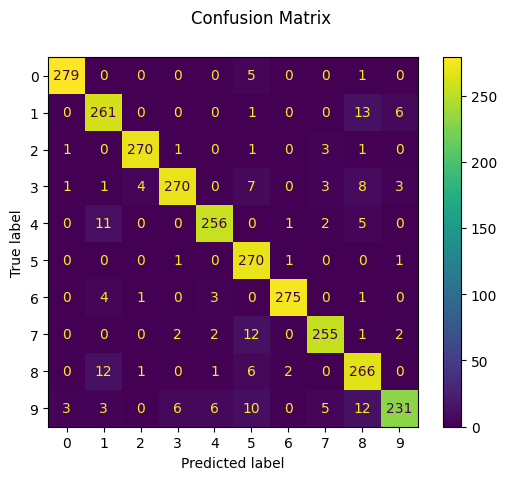

In [23]:
parameters = {
    'validation_fraction': (0.1, 0.4, 0.7),
    'max_iter': (1000, 100, 2000),
    'tol': (1e-3, 1e-1, 1e-5)}
perceptron = Perceptron(random_state=42)
clf = GridSearchCV(perceptron, parameters)
clf.fit(X_trainUCI,y_trainUCI)
y_pred = clf.predict(X_testUCI)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_testUCI, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_testUCI, y_pred)
disp.figure_.suptitle("Confusion Matrix")

plt.show()


## Regresor Logístico

In [ ]:
regr = LogisticRegression(random_state=42) 
regr.fit(X_train, y_train);
#Se hace la prediccion con los datos de testeo
y_pred = regr.predict(X_testUCI)
print(
    f"Classification report for classifier {regr}:\n"
    f"{metrics.classification_report(y_testUCI, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_testUCI, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Mejora Regresor Logístico

Parametros escogidos:
- C: Inversa de la fuerza de regularización; debe ser un flotador positivo. Al igual que en las máquinas de vectores de soporte, los valores más pequeños especifican una regularización más fuerte.
- tol: El criterio de parada. 

- max_iter: El número máximo de pasos sobre los datos de entrenamiento (también conocidos como épocas). Solo afecta el comportamiento en el método de ajuste, y no en el método de ajuste parcial.

In [ ]:
parameters = {
    'C': (1.0, 0.5, 1.5),
    'max_iter': (1000, 100, 2000),
    'tol': (1e-4, 1e-1, 1e-5)}
regr = LogisticRegression(random_state=42) 
clf = GridSearchCV(regr, parameters)
clf.fit(X_trainUCI,y_trainUCI)
y_pred = clf.predict(X_testUCI)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_testUCI, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_testUCI, y_pred)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

## Arbol de Decisión

C:\Users\hugot\miniconda3\envs\ia2023\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Classification report for classifier DecisionTreeClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       554
           1       0.82      0.75      0.78       571
           2       0.92      0.87      0.89       557
           3       0.78      0.81      0.79       572
           4       0.87      0.74      0.80       568
           5       0.67      0.76      0.71       558
           6       0.86      0.89      0.87       558
           7       0.92      0.82      0.87       566
           8       0.66      0.72      0.69       554
           9       0.68      0.77      0.72       562

    accuracy                           0.80      5620
   macro avg       0.81      0.80      0.81      5620
weighted avg       0.81      0.80      0.81      5620


Confusion matrix:
[[515   0   0   7   5   9   6   0   6   6]
 [  0 427  15  14   9  11   2   2  67  24]
 [  2   7 484  22   0   5   2   0  28   7]
 [  1  11   8 4

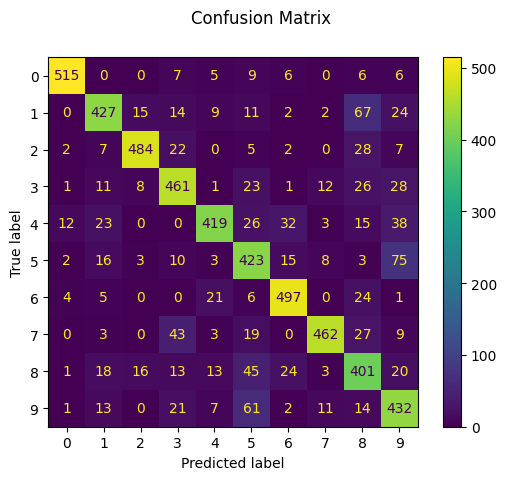

In [36]:
tree = DecisionTreeClassifier(random_state=42);
tree.fit(X_train,y_train);

#Se hace la prediccion con los datos de testeo
y_pred = tree.predict(X_testUCI)

print(
    f"Classification report for classifier {tree}:\n"
    f"{metrics.classification_report(y_testUCI, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_testUCI, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Mejora Arbol de Decisión

Parametros seleccionados:
- max_depth: La profundidad máxima del árbol. Si es Ninguno, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split muestras.
- min_impurity_decrease:Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor.
- max_leaf_nodes: 

In [ ]:
parameters = {
    'C': (1.0, 0.5, 1.5),
    'max_iter': (1000, 100, 2000),
    'tol': (1e-4, 1e-1, 1e-5)}
tree = DecisionTreeClassifier(random_state=42);
clf = GridSearchCV(regr, parameters)
clf.fit(X_trainUCI,y_trainUCI)
y_pred = clf.predict(X_testUCI)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_testUCI, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_testUCI, y_pred)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

## Bosque Aleatorio

In [ ]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train);

#Se hace la prediccion con los datos de testeo
y_pred = forest.predict(X_testUCI)

print(
    f"Classification report for classifier {regr}:\n"
    f"{metrics.classification_report(y_testUCI, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_testUCI, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

COGER 3 PARAMETROS PARA EL CROSS VALIDATION Y SABER EXPLICARLOS LIBRERIA sklearn.model_selection.GridSearchCV

## MEJORA BOSQUE

parameters = {
    'C': (1.0, 0.5, 1.5),
    'max_iter': (1000, 100, 2000),
    'tol': (1e-4, 1e-1, 1e-5)}
forest = RandomForestClassifier(random_state=42)
clf = GridSearchCV(forest, parameters)
clf.fit(X_trainUCI,y_trainUCI)
y_pred = clf.predict(X_testUCI)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_testUCI, y_pred)}\n"
)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_testUCI, y_pred)
disp.figure_.suptitle("Confusion Matrix")

plt.show()